<a href="https://colab.research.google.com/github/ShreeshaVoniyadka/DataScience/blob/main/FactorsAffectingAirPollutionInIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------  Factors affecting air pollution and its Effects on various factors -----

Reference: Ogd,Websites,Python tutorials

GitHub : https://github.com/ShreeshaVoniyadka/DataScience/tree/main

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df1=pd.read_csv('/content/gdrive/MyDrive/airpollutuon/data.csv', encoding="ISO-8859-1",low_memory=False)
# vehicle=pd.read_excel('/content/gdrive/MyDrive/airpollutuon/datafile.xls')
# plt.rcParams['figure.figsize'] = (10, 7)
df1.head()


Mounted at /content/gdrive


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df2=pd.read_excel("/content/gdrive/MyDrive/airpollutuon/GDP.xlsx")
df2.head()


,YEAR,GDP Nominal\n(Current USD),GDP Real\n(Inflation adj.),GDP\nchange,GDP per capita,Pop.\nchange\t,Population
0,2017,2650725335364,2660371703953,0.0668,1987,0.0107,1338676785
1,2016,2290432075124,2482433620957,0.0711,1874,0.0110,1324517249
2,2015,2103587813812,2294947293526,0.0815,1752,0.0112,1310152403
3,2014,2039127446299,2125024908809,0.0741,1640,0.0115,1295600772
4,2013,1856722121394,1978419519434,0.0639,1545,0.0119,1280842125


In [ ]:
df3=pd.read_excel("/content/gdrive/MyDrive/airpollutuon/datafile.xlsx")
df3.head()    

,Year (As on 31st March),All Vehicles,Two Wheelers*,"Cars, Jeeps and Taxis",Buses @,Goods Vehicles,Others**
0,1951,306,27,159,34,82,4
1,1956,426,41,203,47,119,16
2,1959,562,67,267,48,148,32
3,1960,605,76,282,54,157,36
4,1961,665,88,310,57,168,42


In [ ]:
# airindex=[df,df2]
# frames=pd.concat(airindex)
import datetime as dt
df1['Date'] = pd.to_datetime(df1['date'])
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1.drop(['date','Date'],inplace=True,axis=1)
df1.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,year
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990.0
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990.0
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990.0
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990.0
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990.0


In [ ]:
df4=pd.merge(df1, df2, left_on="year", right_on="YEAR").drop('YEAR', axis=1)
df4.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,year,GDP Nominal\n(Current USD),GDP Real\n(Inflation adj.),GDP\nchange,GDP per capita,Pop.\nchange\t,Population
0,203,January - M011994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,4.4,8.9,NaN,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831
1,95,January - M011994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,9.6,20.3,NaN,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831
2,202,January - M011994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,4.2,14.1,NaN,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831
3,151,January - M011994,Andhra Pradesh,Hyderabad,NaN,Industrial Area,9.7,9.0,NaN,98.0,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831
4,152,January - M011994,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",51.6,63.0,NaN,130.0,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831


In [ ]:
df=pd.merge(df4, df3, left_on="year", right_on="Year (As on 31st March)").drop('Year (As on 31st March)', axis=1)
df.head()



,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,year,GDP Nominal\n(Current USD),GDP Real\n(Inflation adj.),GDP\nchange,GDP per capita,Pop.\nchange\t,Population,All Vehicles,Two Wheelers*,"Cars, Jeeps and Taxis",Buses @,Goods Vehicles,Others**
0,203,January - M011994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,4.4,8.9,NaN,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
1,95,January - M011994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,9.6,20.3,NaN,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
2,202,January - M011994,Andhra Pradesh,Hyderabad,Andhra Pradesh Pollution Control Board,NaN,4.2,14.1,NaN,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
3,151,January - M011994,Andhra Pradesh,Hyderabad,NaN,Industrial Area,9.7,9.0,NaN,98.0,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
4,152,January - M011994,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",51.6,63.0,NaN,130.0,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109


In [ ]:
df.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333561 entries, 0 to 333560
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      333561 non-null  object 
 1   location                   333561 non-null  object 
 2   type                       329018 non-null  object 
 3   so2                        301737 non-null  float64
 4   no2                        319196 non-null  float64
 5   rspm                       301490 non-null  float64
 6   spm                        192303 non-null  float64
 7   pm2_5                      0 non-null       float64
 8   year                       333561 non-null  float64
 9   GDP Nominal
(Current USD)  333561 non-null  int64  
 10  GDP Real
(Inflation adj.)  333561 non-null  int64  
 11  GDP
change                 333561 non-null  float64
 12  GDP per capita             333561 non-null  int64  
 13  Pop.
change	               33

,state,location,type,so2,no2,rspm,spm,pm2_5,year,GDP Nominal\n(Current USD),GDP Real\n(Inflation adj.),GDP\nchange,GDP per capita,Pop.\nchange\t,Population,All Vehicles,Two Wheelers*,"Cars, Jeeps and Taxis",Buses @,Goods Vehicles,Others**
0,Andhra Pradesh,Hyderabad,NaN,4.4,8.9,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
1,Andhra Pradesh,Hyderabad,NaN,9.6,20.3,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
2,Andhra Pradesh,Hyderabad,NaN,4.2,14.1,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
3,Andhra Pradesh,Hyderabad,Industrial Area,9.7,9.0,NaN,98.0,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",51.6,63.0,NaN,130.0,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109


In [ ]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,year,GDP Nominal\n(Current USD),GDP Real\n(Inflation adj.),GDP\nchange,GDP per capita,Pop.\nchange\t,Population,All Vehicles,Two Wheelers*,"Cars, Jeeps and Taxis",Buses @,Goods Vehicles,Others**
0,Andhra Pradesh,Hyderabad,NaN,4.4,8.9,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
1,Andhra Pradesh,Hyderabad,NaN,9.6,20.3,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
2,Andhra Pradesh,Hyderabad,NaN,4.2,14.1,NaN,NaN,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
3,Andhra Pradesh,Hyderabad,Industrial Area,9.7,9.0,NaN,98.0,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",51.6,63.0,NaN,130.0,NaN,1994.0,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109


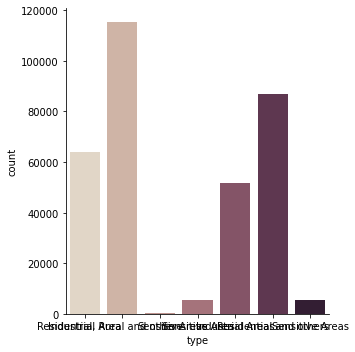

In [ ]:
######################################## do add threshold lines
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)


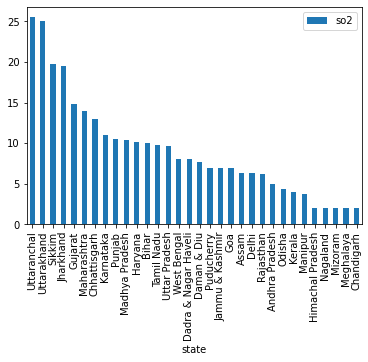

In [ ]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()


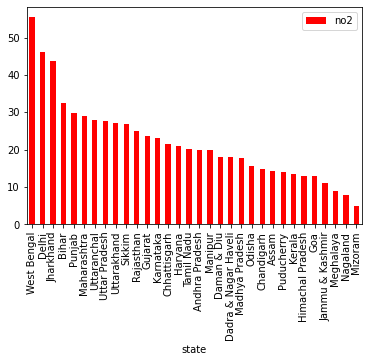

In [ ]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

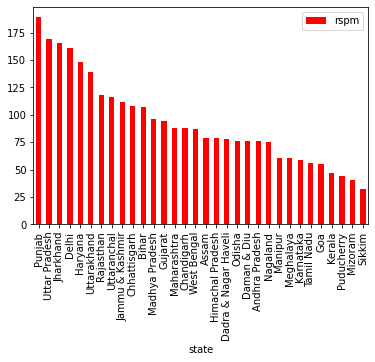

In [ ]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')


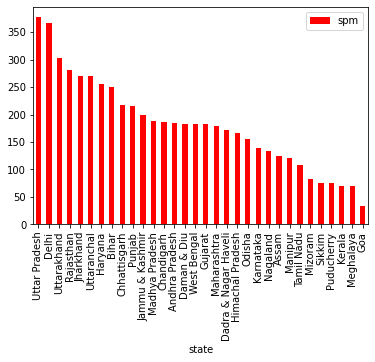

In [ ]:
#spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


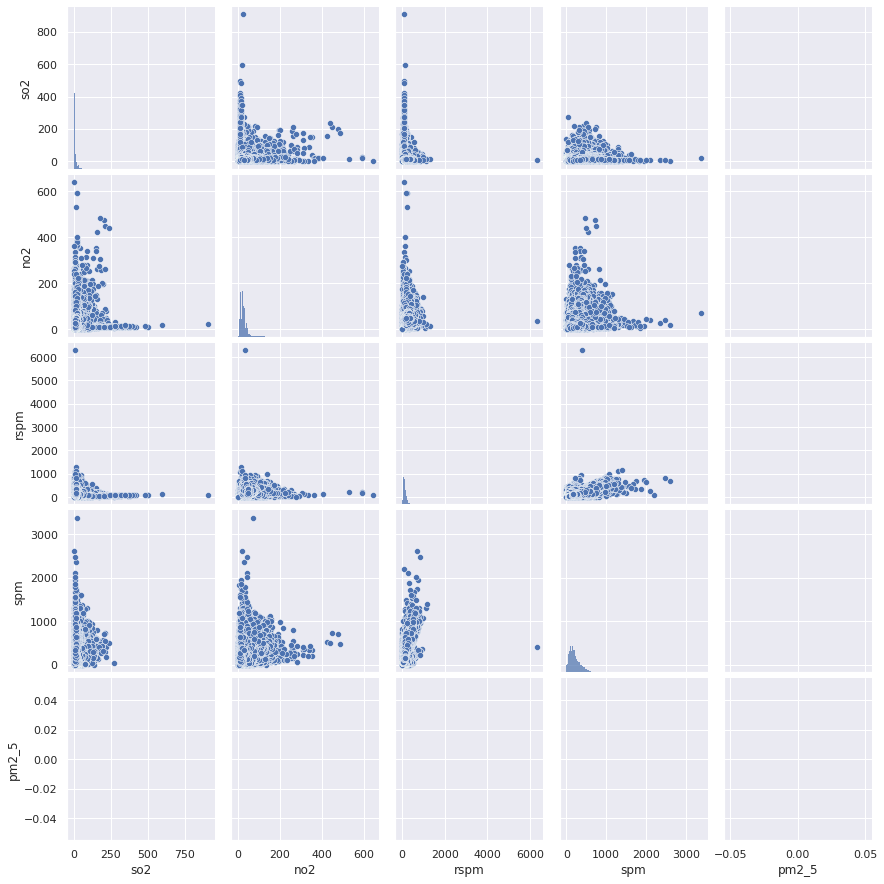

In [ ]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [ ]:
# Creating an year column


df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,year,GDP Nominal\n(Current USD),GDP Real\n(Inflation adj.),GDP\nchange,GDP per capita,Pop.\nchange\t,Population,All Vehicles,Two Wheelers*,"Cars, Jeeps and Taxis",Buses @,Goods Vehicles,Others**
0,Andhra Pradesh,Hyderabad,NaN,4.4,8.9,NaN,NaN,NaN,1994,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
1,Andhra Pradesh,Hyderabad,NaN,9.6,20.3,NaN,NaN,NaN,1994,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
2,Andhra Pradesh,Hyderabad,NaN,4.2,14.1,NaN,NaN,NaN,1994,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
3,Andhra Pradesh,Hyderabad,Industrial Area,9.7,9.0,NaN,98.0,NaN,1994,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",51.6,63.0,NaN,130.0,NaN,1994,327275591370,604493654736,0.0666,639,0.0196,945601831,27660,18899,3569,392,1691,3109


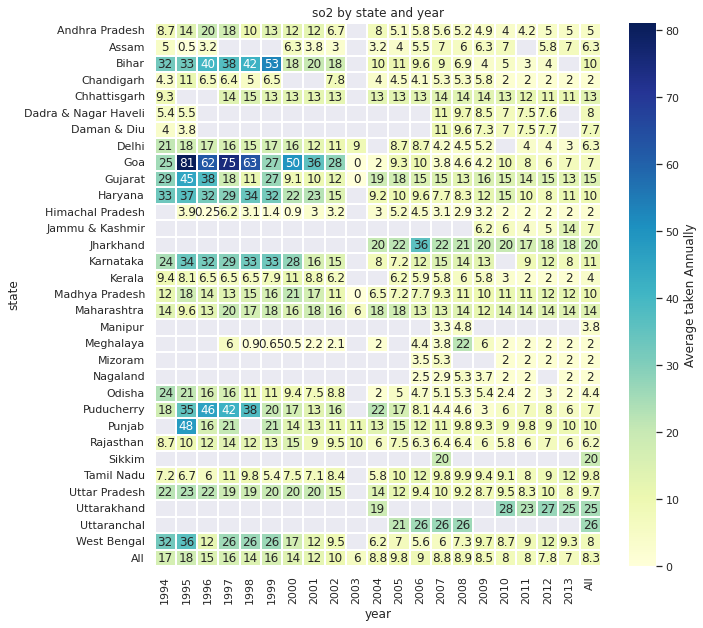

In [ ]:
 #Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})


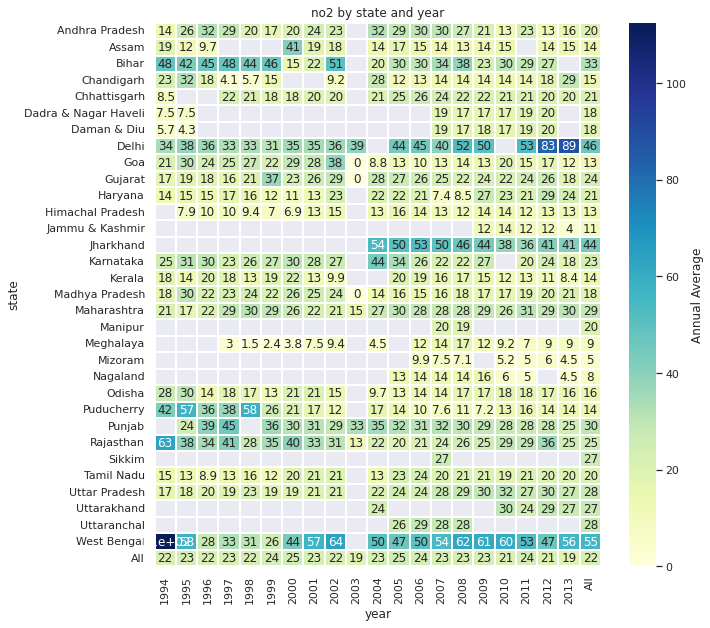

In [ ]:
    
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


Text(0.5, 1.0, 'rspm by state and year')

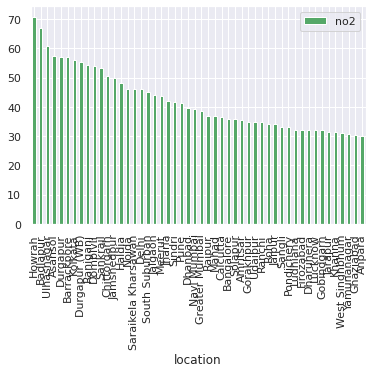

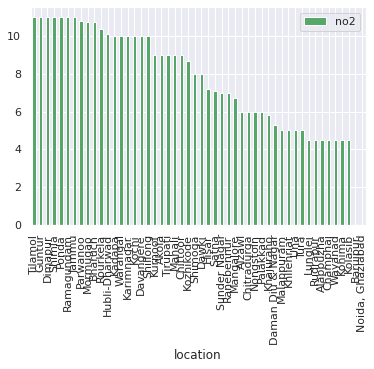

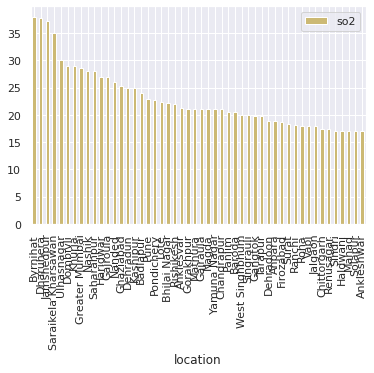

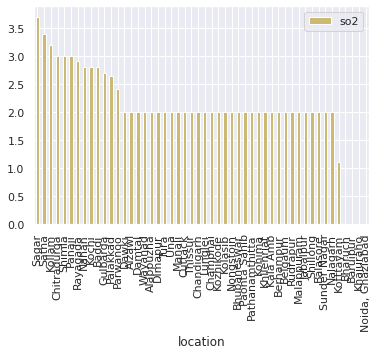

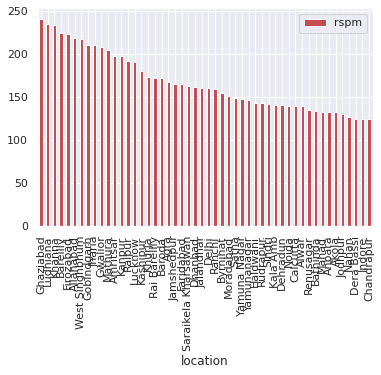

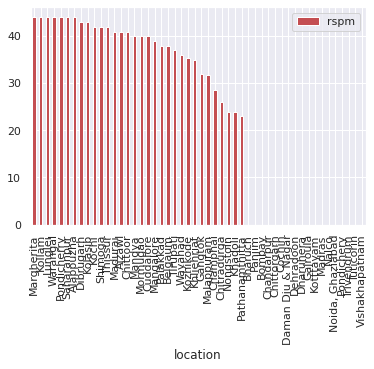

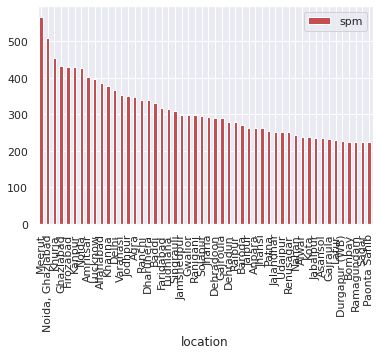

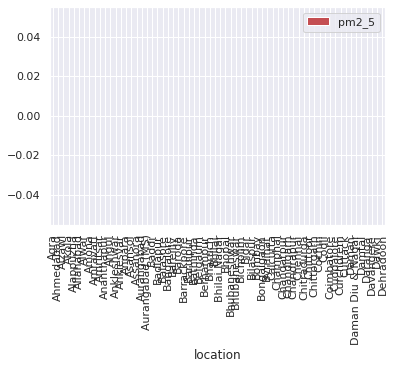

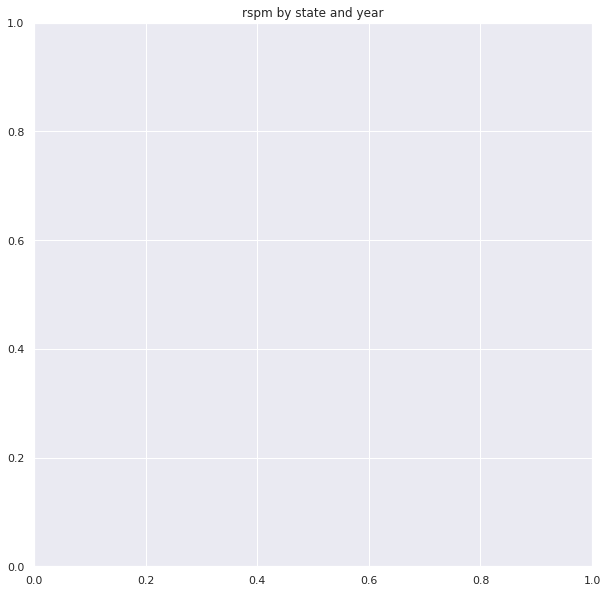

In [ ]:
 


# bar plot of no2 vs location - desc order - first 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

# bar plot of no2 vs location - desc order - last 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')

# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

# rspm = PM10 - location wise - last 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')

# spm = PM10 - location wise - first 50
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r')

# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')


# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
# sns.heatmap(df.pivot_table('rspm', index='state',
#                 columns = ['year'], aggfunc = 'median', margins = True),
#                 annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})


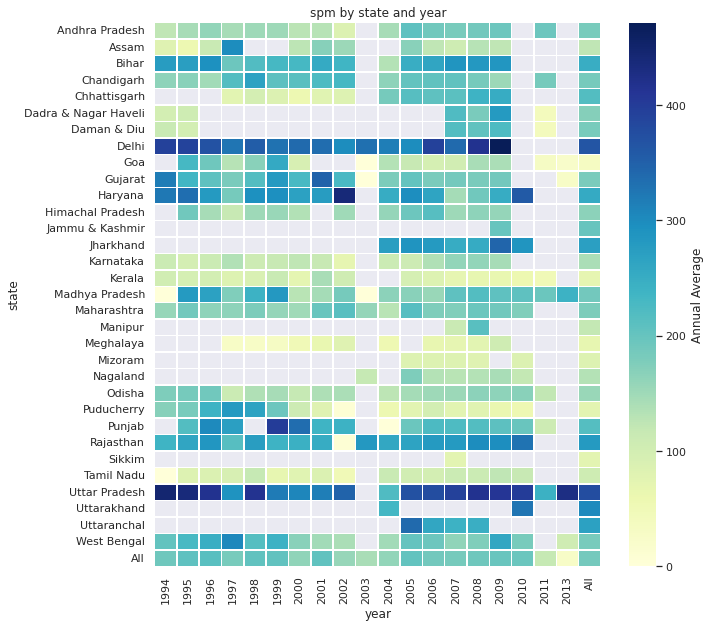

In [ ]:
    

# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})

In [ ]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'year', 'GDP Nominal\n(Current USD)', 'GDP Real\n(Inflation adj.)',
       'GDP\nchange', 'GDP per capita', 'Pop.\nchange\t', 'Population',
       'All Vehicles', 'Two Wheelers*', 'Cars, Jeeps and Taxis', 'Buses @',
       'Goods Vehicles', 'Others**'],
      dtype='object')

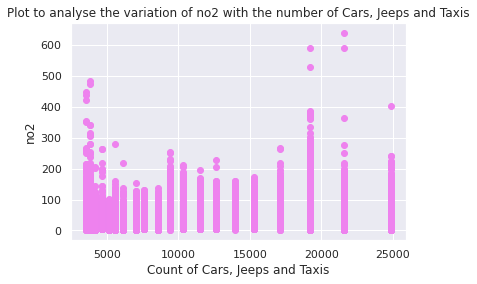

In [ ]:
plt.scatter(df["Cars, Jeeps and Taxis"],df["no2"],color="violet")
plt.xlabel("Count of Cars, Jeeps and Taxis")
plt.ylabel("no2")
plt.title("Plot to analyse the variation of no2 with the number of Cars, Jeeps and Taxis")
plt.show()

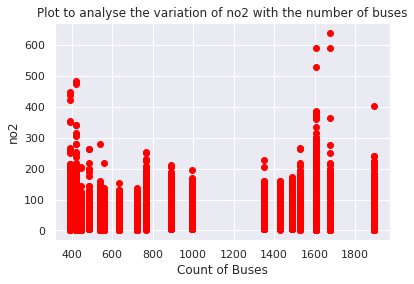

In [ ]:
plt.scatter(df["Buses @"],df["no2"],color="red")
plt.xlabel("Count of Buses")
plt.ylabel("no2")
plt.title("Plot to analyse the variation of no2 with the number of buses")
plt.show()

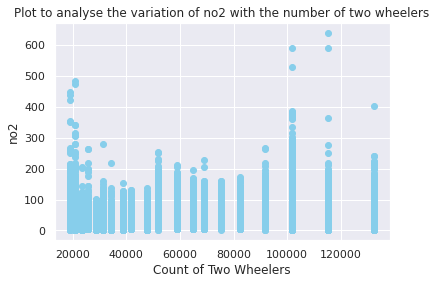

In [ ]:
plt.scatter(df["Two Wheelers*"],df["no2"],color="skyblue")
plt.xlabel("Count of Two Wheelers")
plt.ylabel("no2")
plt.title("Plot to analyse the variation of no2 with the number of two wheelers")
plt.show()

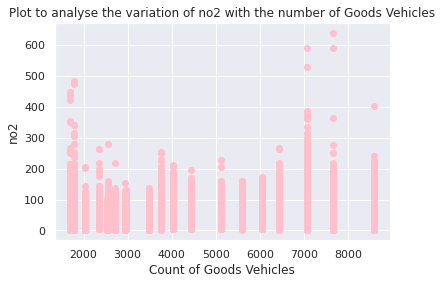

In [ ]:
plt.scatter(df['Goods Vehicles'],df["no2"],color="pink")
plt.xlabel("Count of Goods Vehicles")
plt.ylabel("no2")
plt.title("Plot to analyse the variation of no2 with the number of Goods Vehicles")
plt.show()

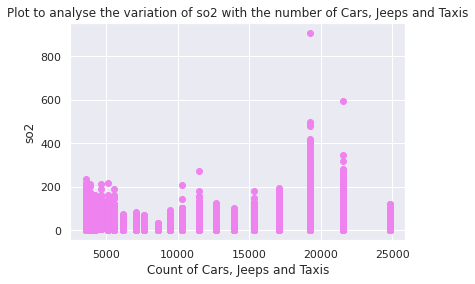

In [ ]:
plt.scatter(df["Cars, Jeeps and Taxis"],df["so2"],color="violet")
plt.xlabel("Count of Cars, Jeeps and Taxis")
plt.ylabel("so2")
plt.title("Plot to analyse the variation of so2 with the number of Cars, Jeeps and Taxis")
plt.show()

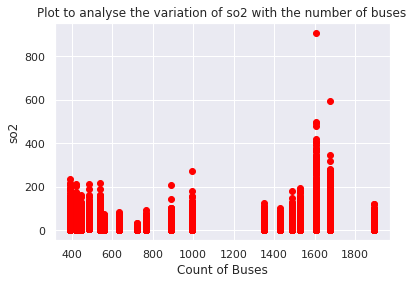

In [ ]:
plt.scatter(df["Buses @"],df["so2"],color="red")
plt.xlabel("Count of Buses")
plt.ylabel("so2")
plt.title("Plot to analyse the variation of so2 with the number of buses")
plt.show()

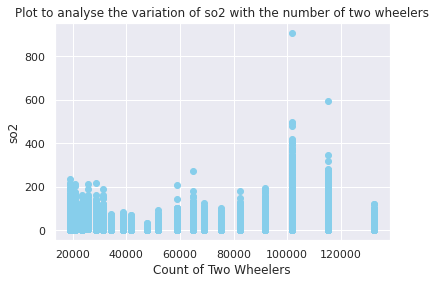

In [ ]:
plt.scatter(df["Two Wheelers*"],df["so2"],color="skyblue")
plt.xlabel("Count of Two Wheelers")
plt.ylabel("so2")
plt.title("Plot to analyse the variation of so2 with the number of two wheelers")
plt.show()

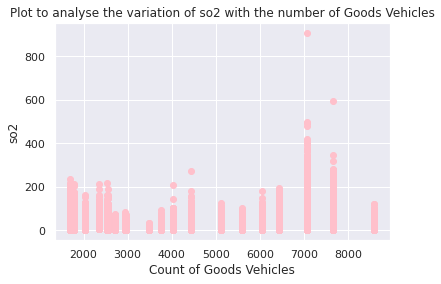

In [ ]:
plt.scatter(df['Goods Vehicles'],df["so2"],color="pink")
plt.xlabel("Count of Goods Vehicles")
plt.ylabel("so2")
plt.title("Plot to analyse the variation of so2 with the number of Goods Vehicles")
plt.show()

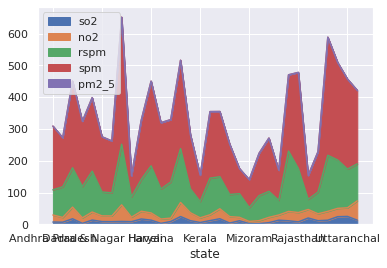

In [ ]:
group_emissions=df.groupby("state").mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
group_emissions.plot.area()


In [ ]:
no2_emm=group_emissions.sort_values(by="no2",ascending=False).head(10)
no2_emm=no2_emm.loc[:,['no2']]
no2_emm.head()

,no2
state,
West Bengal,60.866352
Delhi,52.118412
Jharkhand,44.205993
Bihar,36.585986
Maharashtra,31.347853


In [ ]:
so2_emm=group_emissions.sort_values(by="so2",ascending=False).head(10)
so2_emm=so2_emm.loc[:,["so2"]]
so2_emm.head()


,so2
state,
Uttaranchal,24.697736
Jharkhand,24.364092
Uttarakhand,23.859883
Sikkim,19.800000
Maharashtra,17.480117


In [ ]:
spm_emm=group_emissions.sort_values(by="spm",ascending=False).head(10)
spm_emm=spm_emm.loc[:,["spm"]]
spm_emm.head()


,spm
state,
Delhi,399.666409
Uttar Pradesh,371.556586
Uttarakhand,306.758923
Rajasthan,302.523538
Uttaranchal,283.335714


In [ ]:
rspm_emm=group_emissions.sort_values(by="rspm",ascending=False).head(10)
rspm_emm=rspm_emm.loc[:,["rspm"]]
rspm_emm.head()

,rspm
state,
Delhi,190.712601
Punjab,189.741569
Uttar Pradesh,176.201977
Jharkhand,169.488869
Uttarakhand,152.231369


In [ ]:
pm25_emm=group_emissions.sort_values(by="pm2_5",ascending=False).head(10)
pm25_emm=pm25_emm.loc[:,["pm2_5"]]
pm25_emm.head()

,pm2_5
state,
Andhra Pradesh,NaN
Assam,NaN
Bihar,NaN
Chandigarh,NaN
Chhattisgarh,NaN


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


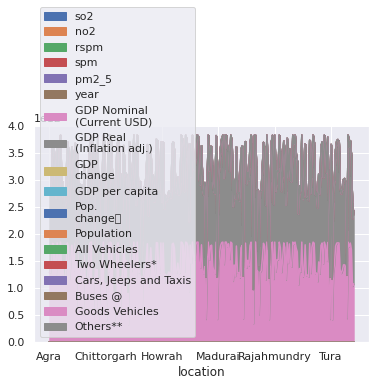

In [ ]:
location_emm=df.groupby("location").mean([['so2','no2','rspm','spm','pm2_5']])
location_emm.plot.area()

In [ ]:
loc_no2=location_emm.sort_values(by='no2',ascending=False).head(10)
loc_no2=loc_no2.loc[:,['no2']]
loc_no2.head()


,no2
location,
Howrah,79.866254
Badlapur,68.368286
Ulhasnagar,62.170569
Kolkata,61.015581
Raniganj,59.361778


In [ ]:
loc_no2=location_emm.sort_values(by='so2',ascending=False).head(10)
loc_no2=loc_no2.loc[:,['so2']]
loc_no2.head()

,so2
location,
Byrnihat,52.737321
Raniganj,42.592148
Pondichery,39.413571
Jamshedpur,38.023264
Dharuhera,37.800000


In [ ]:
loc_no2=location_emm.sort_values(by='spm',ascending=False).head(10)
loc_no2=loc_no2.loc[:,['spm']]
loc_no2.head()

,spm
location,
Meerut,595.135118
"Noida, Ghaziabad",502.000000
Allahabad,418.918985
Kanpur,412.907929
Khurja,412.856347


In [ ]:
loc_no2=location_emm.sort_values(by='rspm',ascending=False).head(10)
loc_no2=loc_no2.loc[:,['rspm']]
loc_no2.head()

,rspm
location,
West Singhbhum,279.983471
Ghaziabad,250.513915
Ludhiana,233.807639
Bareilly,228.253335
Khanna,226.675887


In [ ]:
loc_no2=location_emm.sort_values(by='no2',ascending=False).head(10)
loc_no2=loc_no2.loc[:,['pm2_5']]
loc_no2.head()

,pm2_5
location,
Howrah,NaN
Badlapur,NaN
Ulhasnagar,NaN
Kolkata,NaN
Raniganj,NaN


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


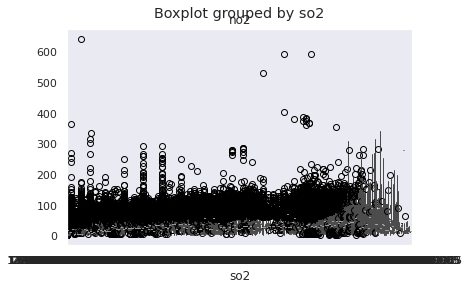

In [ ]:
df.boxplot(by ='so2', column =['no2'], grid = False)


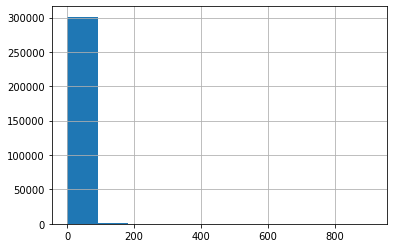

In [ ]:
df['so2'].hist()

In [ ]:
from sklearn.preprocessing import StandardScaler
def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [ ]:
import scipy.stats
from scipy.stats import *
def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)
   #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)        
fit_distribution('so2',0.99,0.01)

(0.4283617749859612, -1.0812119890265854, 1.3699275055150069)

(9.842283940160602e-17, 1.0)

(2347384.600872664, 1544001.8548031123, 1544002.2723408309)



/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.9162184994775506, 7.717537220719532, -1.0812119890265854, 8.52928715688509)

(0.5892433522676768, -1.3962696791849587, 2.369593242263138)

(-1.0812119890265852, 5.897614246340773)

(0.6771416219823607, -1.0812119890265854, 1.350957330341546)

(-1.0812119890265852, 1.0812119890265852)

(0.7506312527156147, -1.3228954194849494, 1.0136957813284961)

(2.2741485358419227, 4.464219813383556e-17, 1.229418330889771)

(0.007227593513693068, -1.124923835035843, 5.9466392854616)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
7         expon     11168.0
4      invgauss     11653.0
8       lognorm     12202.0
3          beta     35972.0
9      pearson3     41184.0
2   weibull_max     63768.0
6         gamma    127410.0
0   weibull_min    221653.0
1          norm    223033.0
10       triang    250104.0
5       uniform    599566.0


In [ ]:
y_std,len_y,y = standarise('so2',0.99,0.01)

Text(0, 0.5, 'pdf')

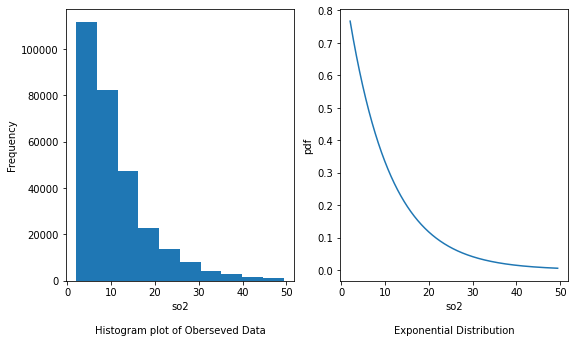

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('so2\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,expon.pdf(y_std,-1.19, 1.19))
axes[1].set_xlabel('so2\n\nExponential Distribution')
axes[1].set_ylabel('pdf')


In [ ]:
fit_distribution('no2',0.99,0.01)

(1.4423568180125788, -1.4104626578370398, 1.5540666594864518)

(-3.779712199636226e-16, 0.9999999999999999)

(127797439.50558662, 91651846.01087856, 91651846.44708191)



/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(1.959133055099433, 39.76562843786248, -1.452039572922585, 30.924637297183363)

(0.2802247913632707, -1.9309058215030275, 6.890565366695009)

(-1.3902825225803261, 5.9113785114371336)

(2.118319925788919, -1.4678045743973267, 0.6929124907458764)

(-1.3902825225803261, 1.3902825225803257)

(0.5217950503488911, -1.8641837656970803, 1.6306465127671033)

(1.3741335992098707, -1.9864414731481836e-16, 1.00848277211642)

(1.624068820913591e-10, -1.3902825236694256, 6.66980974603903)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
4      invgauss       402.0
8       lognorm       606.0
6         gamma       808.0
9      pearson3       808.0
3          beta      1138.0
0   weibull_min      2966.0
2   weibull_max      8602.0
1          norm     91772.0
7         expon    119068.0
10       triang    143315.0
5       uniform    432631.0


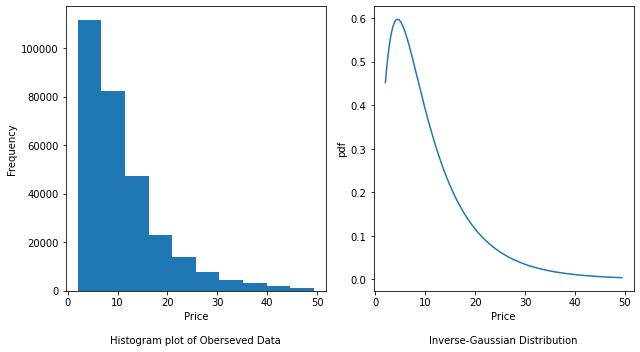

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
axes[1].set_xlabel('Price\n\nInverse-Gaussian Distribution')
axes[1].set_ylabel('pdf')
fig.tight_layout()

In [ ]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'year', 'GDP Nominal\n(Current USD)', 'GDP Real\n(Inflation adj.)',
       'GDP\nchange', 'GDP per capita', 'Pop.\nchange\t', 'Population',
       'All Vehicles', 'Two Wheelers*', 'Cars, Jeeps and Taxis', 'Buses @',
       'Goods Vehicles', 'Others**'],
      dtype='object')

In [ ]:

# Pearson's Correlation test

GDP_parameters = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
Education_parameters = ['GDP Nominal\n(Current USD)', 'Population',
       'All Vehicles']


In [ ]:

# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
for g in GDP_parameters:
    for e in Education_parameters:
        temp_df = df[[g, e]]
        #temp_df.dropna(inplace=True)
        x1 = temp_df[g].values
        x2 = temp_df[e].values
        stat, p = spearmanr(x1, x2)
        if p > 0.05:
            pass
            # print(g, e, "Independent")
        else:
            print("factors:", g, "\td Paramter:", e, "Dependent")

NameError: ignored

In [ ]:
# Kendall's Rank Correlation Test
from scipy.stats import kendalltau
for g in GDP_parameters:
    for e in Education_parameters:
        temp_df = df[[g, e]]
        temp_df.dropna(inplace=True)
        x1 = temp_df[g].values
        x2 = temp_df[e].values
        stat, p = kendalltau(x1, x2)
        if p > 0.05:
            pass
            # print(g, e, "Independent")
        else:
            print("GDP Paramter:", g, "\tEducation Paramter:", e, "Dependent")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying

GDP Paramter: so2 	Education Paramter: GDP Nominal
(Current USD) Dependent
GDP Paramter: so2 	Education Paramter: Population Dependent
GDP Paramter: so2 	Education Paramter: All Vehicles Dependent
GDP Paramter: no2 	Education Paramter: GDP Nominal
(Current USD) Dependent


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


GDP Paramter: no2 	Education Paramter: Population Dependent
GDP Paramter: no2 	Education Paramter: All Vehicles Dependent
GDP Paramter: rspm 	Education Paramter: GDP Nominal
(Current USD) Dependent


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying

GDP Paramter: rspm 	Education Paramter: Population Dependent
GDP Paramter: rspm 	Education Paramter: All Vehicles Dependent
GDP Paramter: spm 	Education Paramter: GDP Nominal
(Current USD) Dependent
GDP Paramter: spm 	Education Paramter: Population Dependent
GDP Paramter: spm 	Education Paramter: All Vehicles Dependent
GDP Paramter: pm2_5 	Education Paramter: GDP Nominal
(Current USD) Dependent
GDP Paramter: pm2_5 	Education Paramter: Population Dependent
GDP Paramter: pm2_5 	Education Paramter: All Vehicles Dependent


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying